In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# importing required libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
# Reading saved data into "Dataframe"
import pandas as pd
fake_job_postings = pd.read_csv('/content/drive/My Drive/INSAID/fake_job_postings.csv')
fake_job_postings.tail(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17870,17871,Senior Financial Analyst (Retail),"US, CA, Gardena",NaN,NaN,PROSULTING IS PEOPLE The ProSulting difference...,We are activity searching for a Senior Financi...,Must have a minimum of 3 + years in Financial ...,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Retail,Financial Analyst,0
17871,17872,Water Truck Driver,"US, PA, Waynesburg",NaN,NaN,Valor Services provides Workforce Solutions th...,Requires skilled work in operating commercial ...,GED or diploma required.Requires minimum of on...,NaN,0,1,1,Full-time,NaN,NaN,Oil & Energy,NaN,0
17872,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,0,1,0,Full-time,NaN,NaN,Internet,Product Management,0
17873,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,0,1,0,Contract,NaN,NaN,Utilities,NaN,0
17874,17875,JavaScript Developer,"US, ,",NaN,80000-100000,NaN,"Sr, JavaScript Developer Experience : 4-10 yea...",NaN,NaN,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


#This dataset contains job descriptions and their meta information. A small proportion of these descriptions are fake or scam which can be identified by the column "fraudulent".

The fraudelent is the target variable which contains the value in the form of 0 and 1, where 0 is not fraudlent and 1 is going to consider as the fraudlent 

In [ ]:
fake_job_postings.location.value_counts()

GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
GR, , Thessaloniki         1
US, CA, Oroville           1
US, OK, Chickasha          1
US, , Newcastle            1
US, NY, Warsaw             1
Name: location, Length: 3105, dtype: int64

In [ ]:
pip install pandas-profiling==2.5.0

     |████████████████████████████████| 194kB 2.7MB/s 
     |████████████████████████████████| 10.4MB 8.9MB/s 
     |████████████████████████████████| 133kB 41.0MB/s 
     |████████████████████████████████| 614kB 40.0MB/s 
     |████████████████████████████████| 1.5MB 46.4MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 276kB 41.5MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 327kB 43.0MB/s 
     |████████████████████████████████| 215kB 43.9MB/s 
     |████████████████████████████████| 102kB 9.7MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 747kB 44.3MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.5.0-py2.py3-none-any.whl size=241329 sha256=c792375a70fb582a450b9bb21a8102853aa7b5a152030e9c12600ddaa2699d87
  Stored in directory: /root/.cache/pip/wheels/9b/c

In [ ]:
# Pandas Profiling 
import pandas_profiling
profile = ProfileReport(fake_job_postings[:10000], title="Pandas Profiling Report")
profile.to_file("fake_post.html")

In [ ]:
fake_job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
len(fake_job_postings)

17880

In [ ]:
((fake_job_postings.isnull() | fake_job_postings.isna()).sum() * 100 / fake_job_postings.index.size).round(2)

job_id                  0.00
title                   0.00
location                1.94
department             64.58
salary_range           83.96
company_profile        18.50
description             0.01
requirements           15.07
benefits               40.32
telecommuting           0.00
has_company_logo        0.00
has_questions           0.00
employment_type        19.41
required_experience    39.43
required_education     45.33
industry               27.42
function               36.10
fraudulent              0.00
dtype: float64

In [ ]:
fake_job_postings.drop(columns = ['salary_range','department'], inplace = True)

In [ ]:
fake_job_postings.isnull().sum()

job_id                    0
title                     0
location                346
company_profile        3308
description               1
requirements           2695
benefits               7210
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
dtype: int64

In [ ]:
fake_job_postings['location'].fillna(fake_job_postings['location'].mode()[0], inplace=True)

In [ ]:
fake_job_postings['company_profile'].fillna(fake_job_postings['company_profile'].mode()[0], inplace=True)

In [ ]:
fake_job_postings.tail(10)

,job_id,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17870,17871,Senior Financial Analyst (Retail),"US, CA, Gardena",PROSULTING IS PEOPLE The ProSulting difference...,We are activity searching for a Senior Financi...,Must have a minimum of 3 + years in Financial ...,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Retail,Financial Analyst,0
17871,17872,Water Truck Driver,"US, PA, Waynesburg",Valor Services provides Workforce Solutions th...,Requires skilled work in operating commercial ...,GED or diploma required.Requires minimum of on...,NaN,0,1,1,Full-time,NaN,NaN,Oil & Energy,NaN,0
17872,17873,Product Manager,"US, CA, San Francisco",Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,0,1,0,Full-time,NaN,NaN,Internet,Product Management,0
17873,17874,Recruiting Coordinator,"US, NC, Charlotte",We help teachers get safe &amp; secure jobs ab...,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,0,1,0,Contract,NaN,NaN,Utilities,NaN,0
17874,17875,JavaScript Developer,"US, ,",We help teachers get safe &amp; secure jobs ab...,"Sr, JavaScript Developer Experience : 4-10 yea...",NaN,NaN,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Information Technology,0
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",We help teachers get safe &amp; secure jobs ab...,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


In [ ]:
fake_job_postings['description'].fillna(fake_job_postings['description'].mode()[0], inplace=True)

In [ ]:
fake_job_postings['requirements'].fillna(fake_job_postings['requirements'].mode()[0], inplace=True)

In [ ]:
fake_job_postings['benefits'].fillna(fake_job_postings['benefits'].mode()[0], inplace=True)
fake_job_postings['employment_type'].fillna(fake_job_postings['employment_type'].mode()[0], inplace=True)
fake_job_postings['required_experience'].fillna(fake_job_postings['required_experience'].mode()[0], inplace=True)
fake_job_postings['required_education'].fillna(fake_job_postings['required_education'].mode()[0], inplace=True)
fake_job_postings['industry'].fillna(fake_job_postings['industry'].mode()[0], inplace=True)
fake_job_postings['function'].fillna(fake_job_postings['function'].mode()[0], inplace=True)

In [ ]:
fake_job_postings.isnull().sum()

job_id                 0
title                  0
location               0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [ ]:
fake_job_postings.head(10)

,job_id,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,See job description,0,1,0,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,See job description,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",We help teachers get safe &amp; secure jobs ab...,Job OverviewApex is an environmental consultin...,University degree required. TEFL / TESOL / CEL...,See job description,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
6,7,Head of Content (m/f),"DE, BE, Berlin","Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
8,9,HP BSM SME,"US, FL, Pensacola",Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,See job description,0,1,1,Full-time,Associate,Bachelor's Degree,Information Technology and Services,Information Technology,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix","Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,See job description,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [ ]:
fake_job_postings.drop(columns = ['job_id'], inplace = True)

In [ ]:
fake_job_postings.isnull().sum()

title                  0
location               0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [ ]:
fake_job_postings.shape

(17880, 15)

In [ ]:
fake_job_postings['title'] = fake_job_postings['title'].astype('category').cat.codes
fake_job_postings['location'] = fake_job_postings['location'].astype('category').cat.codes
fake_job_postings['company_profile'] = fake_job_postings['company_profile'].astype('category').cat.codes
fake_job_postings['description'] = fake_job_postings['description'].astype('category').cat.codes
fake_job_postings['requirements'] = fake_job_postings['requirements'].astype('category').cat.codes
fake_job_postings['benefits'] = fake_job_postings['benefits'].astype('category').cat.codes
fake_job_postings['benefits'] = fake_job_postings['benefits'].astype('category').cat.codes
fake_job_postings['employment_type'] = fake_job_postings['employment_type'].astype('category').cat.codes
fake_job_postings['required_experience'] = fake_job_postings['required_experience'].astype('category').cat.codes
fake_job_postings['required_education'] = fake_job_postings['required_education'].astype('category').cat.codes
fake_job_postings['industry'] = fake_job_postings['industry'].astype('category').cat.codes
fake_job_postings['function'] = fake_job_postings['function'].astype('category').cat.codes
#fake_job_postings['title'] = fake_job_postings['title'].astype('category').cat.codes
fake_job_postings.head()

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,6043,2535,1526,4506,3829,4080,0,1,0,2,4,1,58,22,0
1,2183,1073,50,7255,10526,5570,0,1,0,1,6,1,75,7,0
2,1763,1867,1389,7470,4560,4080,0,1,0,1,5,1,58,18,0
3,299,1703,975,9590,3166,3334,0,1,0,1,5,1,22,31,0
4,975,1741,1210,5724,6495,2254,0,1,1,1,5,1,51,16,0


<Figure size 864x432 with 0 Axes>

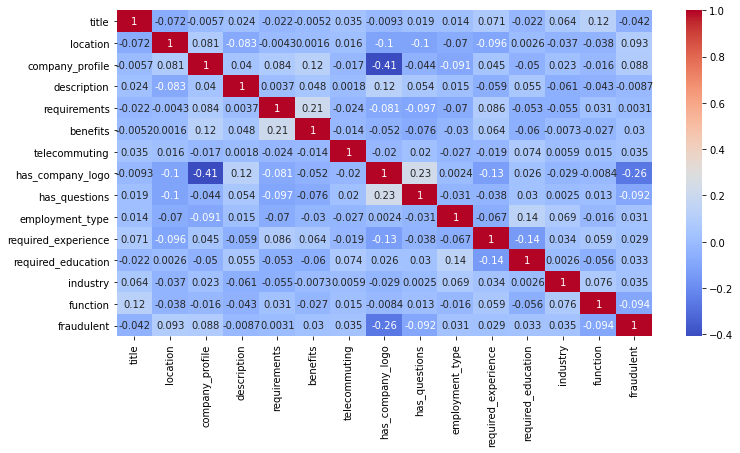

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(fake_job_postings.corr(),cmap='coolwarm',annot=True)

In [ ]:
fake_job_postings.to_csv('fakejobposting.csv', index=False)

In [ ]:
fake_job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   title                17880 non-null  int16
 1   location             17880 non-null  int16
 2   company_profile      17880 non-null  int16
 3   description          17880 non-null  int16
 4   requirements         17880 non-null  int16
 5   benefits             17880 non-null  int16
 6   telecommuting        17880 non-null  int64
 7   has_company_logo     17880 non-null  int64
 8   has_questions        17880 non-null  int64
 9   employment_type      17880 non-null  int8 
 10  required_experience  17880 non-null  int8 
 11  required_education   17880 non-null  int8 
 12  industry             17880 non-null  int16
 13  function             17880 non-null  int8 
 14  fraudulent           17880 non-null  int64
dtypes: int16(7), int64(4), int8(4)
memory usage: 873.2 KB


In [ ]:
X = fake_job_postings[["title","company_profile","requirements","has_company_logo","employment_type","required_experience","required_education"]]
y = fake_job_postings['fraudulent']
#y=np.log1p(y)

In [ ]:
fake_job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   title                17880 non-null  int16
 1   location             17880 non-null  int16
 2   company_profile      17880 non-null  int16
 3   description          17880 non-null  int16
 4   requirements         17880 non-null  int16
 5   benefits             17880 non-null  int16
 6   telecommuting        17880 non-null  int64
 7   has_company_logo     17880 non-null  int64
 8   has_questions        17880 non-null  int64
 9   employment_type      17880 non-null  int8 
 10  required_experience  17880 non-null  int8 
 11  required_education   17880 non-null  int8 
 12  industry             17880 non-null  int16
 13  function             17880 non-null  int8 
 14  fraudulent           17880 non-null  int64
dtypes: int16(7), int64(4), int8(4)
memory usage: 873.2 KB


In [ ]:
fake_job_postings.skew()

title                  0.102954
location               0.053344
company_profile       -0.555053
description           -0.032614
requirements          -0.343132
benefits              -0.764560
telecommuting          4.512188
has_company_logo      -1.463895
has_questions          0.033117
employment_type        2.344180
required_experience   -1.010707
required_education     2.014292
industry               0.529256
function              -0.029949
fraudulent             4.207199
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
X_train

,title,company_profile,requirements,has_company_logo,employment_type,required_experience,required_education
7440,1102,852,9893,1,1,5,1
15953,4045,270,9705,1,1,2,1
9359,10403,1398,10879,1,1,5,1
13070,7003,1030,3678,1,3,2,4
11209,3367,472,3626,1,1,3,1
...,...,...,...,...,...,...,...
10955,2199,1523,1436,1,1,5,1
17289,7717,1622,10908,0,1,5,1
5192,4190,1605,4232,1,1,5,1
12172,3584,1430,3743,0,1,5,1


In [ ]:
y_train.sample(10)

15165    0
16370    0
5176     0
6476     0
10644    0
2272     0
7209     0
4772     1
8350     0
3147     0
Name: fraudulent, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

X_tests = sc.transform(X_test) 
X_trains = sc.transform(X_train)

#label = fake_job_postings.pop('fraudulent')

#sc.fit(fake_job_postings)                                                                                   # fit the data to Standardscaler

#fake_scale = sc.transform(fake_job_postings)                                                               # transform the data

print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(pd.DataFrame(X_trains, columns=X_train.columns).head())     

StandardScaler(copy=True, with_mean=True, with_std=True)

After standardizing our features, the first 5 rows of our data now look like this:

      title  company_profile  ...  required_experience  required_education
0 -1.331061        -0.354924  ...             0.606465           -0.483942
1 -0.422172        -1.517913  ...            -0.949474           -0.483942
2  1.541376         0.736127  ...             0.606465           -0.483942
3  0.491351         0.000766  ...            -0.949474            0.755134
4 -0.631559        -1.114264  ...            -0.430827           -0.483942

[5 rows x 7 columns]


In [ ]:
print('There are {} samples in the training set and {} samples in the test set'.format(
X_train.shape[0], X_test.shape[0]))
print()

There are 14304 samples in the training set and 3576 samples in the test set



In [ ]:
print(X_train.shape)
print(y_train.shape)

(14304, 7)
(14304,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier( criterion='gini')
model.fit(X_trains, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_train = model.predict(X_train) 

In [ ]:
y_pred_test = model.predict(X_test)  

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.9572147651006712


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state = 0)

In [ ]:
model2 = RandomForestClassifier(
                                random_state = 0,
                                max_depth = 5, 
                                min_samples_leaf = 5,
                                min_samples_split = 7,
                                min_weight_fraction_leaf = 0.0,
                                n_estimators = 12, 
                                n_jobs = -1,
                                ) 

In [ ]:
model1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
model2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#Using the model for prediction

In [ ]:
prediction1 = pd.DataFrame()
prediction1 = model1.predict(X_test)

In [ ]:
prediction2 = pd.DataFrame()
prediction2 = model2.predict(X_test)

#Model evaluation

Model evaluation using accuracy score

In [ ]:
print('Accuracy score for test data with model 1 is:',accuracy_score(y_test, prediction1))
print('Accuracy score for test data with model 2 is:',accuracy_score(y_test, prediction2))

Accuracy score for test data with model 1 is: 0.9748322147651006
Accuracy score for test data with model 2 is: 0.9572147651006712


Model evaluation using confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix for test data with model 1 is:\n',confusion_matrix(y_test, prediction1))
print('Confusion matrix for test data with model 2 is:\n',confusion_matrix(y_test, prediction2))

Confusion matrix for test data with model 1 is:
 [[3397   26]
 [  64   89]]
Confusion matrix for test data with model 2 is:
 [[3422    1]
 [ 152    1]]


Comparing confusion matrix for the two models:

- No. of False negative cases are more in model2
- No. of False positive cases are 1 in model2


Calculating Recall and precision score for a clearer picture of the scenario.

Model evaluation using precision score

In [ ]:
from sklearn.metrics import precision_score
precision1 = precision_score(y_test,prediction1)
print('Precision score for test data using model1 is:', precision1)
precision2 = precision_score(y_test,prediction2)
print('Precision score for test data using model2 is:', precision2)

Precision score for test data using model1 is: 0.7739130434782608
Precision score for test data using model2 is: 0.5


Precision score for model2 is 0.5. 

Model evaluation using recall score

In [ ]:
from sklearn.metrics import recall_score
print('Recall score for test data using model1 is:',recall_score(y_test,prediction1))   
print('Recall score for test data using model2 is:',recall_score(y_test,prediction2))

Recall score for test data using model1 is: 0.5816993464052288
Recall score for test data using model2 is: 0.006535947712418301


Recall score of model1 is higher than that of model2.

Model evaluation using F1_score

In [ ]:
from sklearn.metrics import f1_score
print('F1_score for test data using model1 is:',f1_score(y_test, prediction1))
print('F1_score for test data using model2 is:',f1_score(y_test, prediction2))

F1_score for test data using model1 is: 0.664179104477612
F1_score for test data using model2 is: 0.012903225806451615


F1_score for model1 is much higher than that of model 2, but we need to take decision on the basis of Precision Score

Model evaluation using ROC_AUC curve


For model1

Text(0.5, 1.0, 'Receiver Operating Characteristic')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

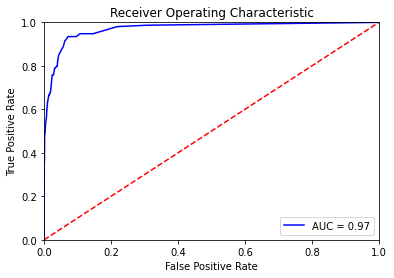

In [ ]:
from sklearn import metrics
probs = model1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

For model2

Text(0.5, 1.0, 'Receiver Operating Characteristic')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

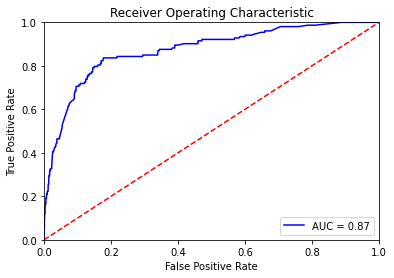

In [ ]:
from sklearn import metrics
probs = model2.predict_proba(X_test)
pred = probs[:,1]
fpr1, tpr1, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr1, tpr1)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Observing the ROC-AUC curve for both the models, AUC score of model1 is higher than model2.